<a href="https://colab.research.google.com/github/AdityaSalagare/lp/blob/main/(2B)Multiclass%20classification%20OCR%20letter%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from  tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  Dense, Dropout, Input
from tensorflow.keras.optimizers import  RMSprop
from tensorflow.keras.datasets import  mnist
import matplotlib.pyplot as plt
from sklearn import  metrics

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

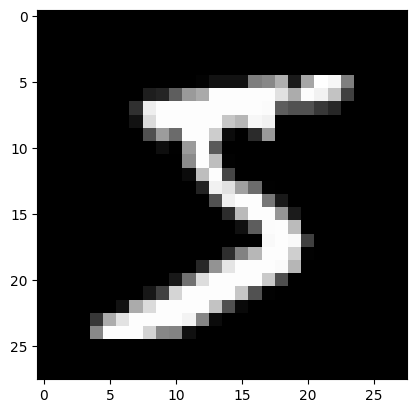

In [3]:
plt.imshow(x_train[0], cmap='gray') # imshow() functionwhich simply displays an image.
plt.show()

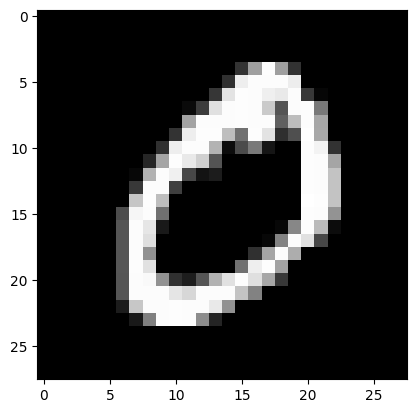

In [6]:
plt.imshow(x_train[1], cmap='gray') # imshow() functionwhich simply displays an image.
plt.show()

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
print("X_train shape", x_train.shape)

print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [9]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype('float32')

In [10]:
x_test = x_test.astype('float32')
x_train /=255# Each image has Intensity from 0to 255
x_test /=255

In [11]:
num_classes =10
y_train=np.eye(num_classes)[y_train] #Returna2-Darraywithoneson thediagonal andzeros elsewhere.
y_test=np.eye(num_classes)[y_test]

In [12]:
model = Sequential()
model = Sequential([Input(shape=(784,)), Dense(512, activation='relu'),])

In [13]:
model.add(Dropout(0.2))# DROP OUT RATIO 20%

In [14]:
model.add(Dense(512, activation='relu'))#returns a sequence of another vectors of dimension 512
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', #for a multi-class classification problem
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [16]:
batch_size =128# batch_size argument is passed tothe layer to define a batch size for the inputs.

epochs =20
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    verbose=1,# verbose=1 will showyou an animated progress bar eg. [==========]
                    validation_data=(x_test,y_test)) #Usingvalidation_datameansyouareprovidingthe training set and validation set yourself, # 60000image/128=469 batch each

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8615 - loss: 0.4426 - val_accuracy: 0.9680 - val_loss: 0.1006
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9666 - loss: 0.1069 - val_accuracy: 0.9739 - val_loss: 0.0817
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9774 - loss: 0.0729 - val_accuracy: 0.9767 - val_loss: 0.0760
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9818 - loss: 0.0576 - val_accuracy: 0.9791 - val_loss: 0.0709
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9862 - loss: 0.0442 - val_accuracy: 0.9819 - val_loss: 0.0652
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9883 - loss: 0.0369 - val_accuracy: 0.9808 - val_loss: 0.0691
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9897 - loss: 0.0316 - val_accuracy: 0.9833 - val_loss: 0.0598
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.

In [17]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[0])

Test loss: 0.07635565102100372
Test accuracy: 0.07635565102100372


In [18]:
predictions = model.predict(x_test)
# predictions.shape == (10000, 10)

# 2. Inspect the first 10 probability vectors
for i in range(10):
    print(f"Sample {i:2d}: {predictions[i]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Sample  0: [4.6062753e-16 4.3219226e-13 8.4077803e-16 9.3297452e-15 2.1193492e-17
 3.3329692e-18 1.6384973e-20 1.0000000e+00 1.0578264e-17 2.5114360e-11]
Sample  1: [1.8511109e-18 6.9445912e-12 1.0000000e+00 2.9929517e-15 6.2579399e-22
 9.6615897e-22 3.5355261e-17 1.6705795e-18 3.8934155e-16 2.4797648e-25]
Sample  2: [8.2474912e-15 1.0000000e+00 9.3853605e-11 6.9205382e-16 2.6829088e-09
 8.3964198e-12 6.0713178e-11 5.3330035e-10 3.9687701e-11 8.3777498e-16]
Sample  3: [1.00000000e+00 7.40649946e-14 3.32613485e-11 8.48557132e-14
 1.29772243e-11 3.82439441e-15 2.77027579e-09 1.04114234e-13
 5.63232441e-17 2.56839515e-11]
Sample  4: [3.0219395e-13 3.5180001e-11 9.1625167e-14 2.7315754e-16 1.0000000e+00
 4.3512440e-17 2.1593247e-13 5.3578808e-10 1.9230401e-16 1.5456662e-08]
Sample  5: [8.29117274e-17 1.00000000e+00 7.20048055e-15 4.68541734e-18
 2.48341059e-09 1.10511076e-14 5.23793892e-14 1.34327591e-10
 1.26832258e-12 5.93314617e-17]
Sample  6: [2

In [19]:
predicted_classes = np.argmax(predictions, axis=1)
# predicted_classes.shape == (10000,)

# Show the first 10 predicted labels
print("First 10 predicted labels:", predicted_classes[:10])

First 10 predicted labels: [7 2 1 0 4 1 4 9 5 9]
